In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib import urlretrieve

In [2]:
mkdir data

In [3]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt

-rw-r--r--  1 shaolongchen  688500 May 24 00:04 ./data/es.txt
-rw-r--r--  1 shaolongchen  363485 May 24 00:04 ./data/vs.txt


In [4]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [5]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [6]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [7]:
new_file = open('./data/es50.txt', 'w')
new_file.writelines('data'+lines[3][:-1]+';DEL'+lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [8]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['data;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [9]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)

In [10]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
data,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [11]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [12]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', dayfirst=True, header=None, skiprows=4, names=cols)

In [13]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [14]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [15]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index>dt.datetime(1999,1,1)]})
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index>dt.datetime(1999,1,1)]}))

In [16]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [17]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115738290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11830ec90>], dtype=object)

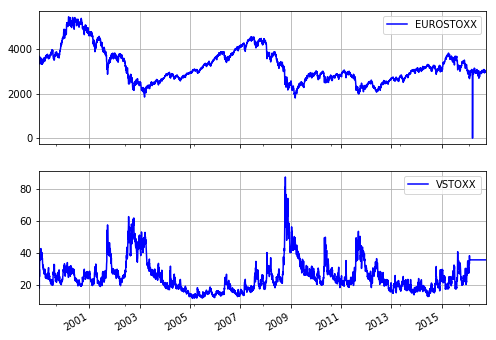

In [18]:
data.plot(subplots=True, grid=True, style='b', figsize=(8,6))

In [19]:
rets = np.log(data/data.shift(1))
rets.head()

/Users/shaolongchen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x118504f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1184a2910>], dtype=object)

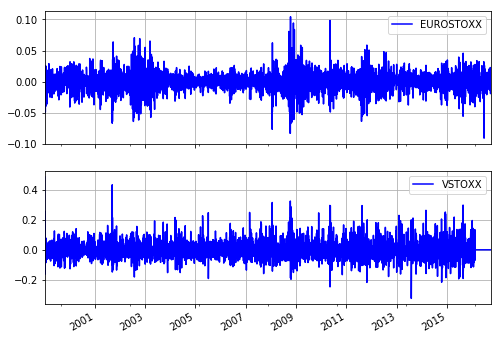

In [20]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8,6))

In [21]:
print rets.EUROSTOXX.describe()
print rets.VSTOXX.describe()

count    4552.000000
mean             NaN
std              NaN
min             -inf
25%        -0.007415
50%         0.000236
75%         0.007841
max              inf
Name: EUROSTOXX, dtype: float64
count    4553.000000
mean        0.000148
std         0.057147
min        -0.326505
25%        -0.033018
50%        -0.001978
75%         0.027283
max         0.489248
Name: VSTOXX, dtype: float64


In [22]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4552 non-null float64
VSTOXX       4553 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [23]:
copy_rets = rets

In [24]:
rets.dropna(axis=0, inplace=True)
rets.head()

,EUROSTOXX,VSTOXX
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
1999-01-11,-0.019593,0.103173


In [25]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4552 entries, 1999-01-05 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4552 non-null float64
VSTOXX       4552 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [26]:
for i in range(len(rets)):
    if rets['EUROSTOXX'][i]==np.inf or rets['EUROSTOXX'][i]==-np.inf: print i

4415
4416


In [27]:
print rets.iloc[4415]
print rets.iloc[4416]

EUROSTOXX        -inf
VSTOXX       0.000000
Name: 2016-03-25 00:00:00, dtype: float64
EUROSTOXX         inf
VSTOXX       0.000000
Name: 2016-03-29 00:00:00, dtype: float64


In [28]:
rets.drop(rets.index[[4415,4416]], inplace=True)
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4550 entries, 1999-01-05 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4550 non-null float64
VSTOXX       4550 non-null float64
dtypes: float64(2)
memory usage: 106.6 KB


In [29]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model

/Users/shaolongchen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4550
Number of Degrees of Freedom:   2

R-squared:         0.5255
Adj R-squared:     0.5254

Rmse:              0.0394

F-stat (1, 4548):  5037.7400, p-value:     0.0000

Degrees of Freedom: model 1, resid 4548

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.7539     0.0388     -70.98     0.0000    -2.8299    -2.6778
     intercept     0.0000     0.0006       0.08     0.9324    -0.0011     0.0012
---------------------------------End of Summary---------------------------------

In [30]:
model.beta

x           -2.753853
intercept    0.000049
dtype: float64

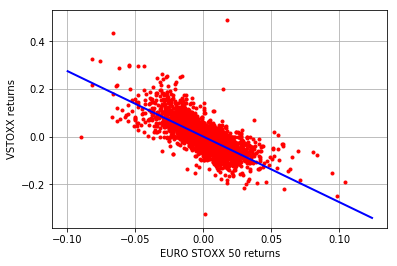

In [31]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1]+0.01)
plt.plot(x, model.beta[1]+model.beta[0]*x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [32]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


In [33]:
rets.VSTOXX.corr(rets.EUROSTOXX)

-0.72494498864781098

/Users/shaolongchen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  if __name__ == '__main__':


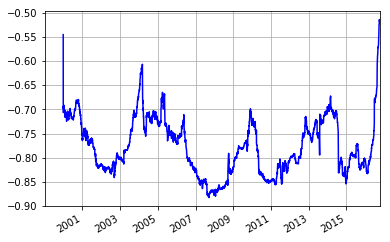

In [34]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b')

In [35]:
!rm ./data/*